# NYC 311

Presentado por: Yosef Guevara Salamanca

## Ejercicio

All 311 service requests since 2010 in New York City

**Descripción:** Para este ejericio se procedera a replicar el **"capituo 8 Visualizing location data
with Datashader"** del libro Data Science with Python and Dask de Jesse C. Daniel.

El objetivo de esta capitulo es:

- Uso de Datashader para visualizar muchos puntos de datos
cuando el downsampling no es apropiado.
- Trazado de mapas de calor interactivos con Datashader
y Bokeh.

Este proceso cuenta con 5 pasos:

1. Projection
2. Aggregation
3. Transformation
4. Colormapping
5. Embedding

In [1]:
# Librerias necesarias

''' 
La libreria datashader nos permite visualizar datasets de gran tamaño
Datashader nos permite graficar metodos haciendo uso de los metodos
y objetos aceptados por Dask
'''

import dask.dataframe as dd
from dask.diagnostics import ProgressBar
import os
import datashader  
import datashader.transfer_functions
from datashader.utils import lnglat_to_meters
import geoviews
import holoviews

from holoviews.operation.datashader import datashade

In [2]:
# Lectura del DataSet
nyc311_geo_data= dd.read_csv('D:/Descargas/311_Service_Requests_from_2010_to_Present.csv', usecols=['Latitude','Longitude']) 
nyc311_geo_data.head()

Latitude  Longitude
0  40.861411 -73.912223
1  40.682647 -73.828064
2  40.855664 -73.896173
3  40.548358 -74.197610
4  40.837553 -73.854677

### 1. Projection

La projection nos permite crear un canvas en blanco de (n,m) pixelespara la posterior visualización de los datos



In [4]:
# Projection
x_range = (-74.3, -73.6)
y_range = (40.4, 41)
scene = datashader.Canvas(plot_width=600, plot_height=600, x_range=x_range,y_range=y_range)

### 2. Agregation

La agregación nos permite crear Buckets para representar los pixeles dentro de la pantalla


In [5]:
# Agregation

aggregation = scene.points(nyc311_geo_data, 'Longitude', 'Latitude')


### 3. Transformation

Esta sección nos permite transformar nuestros datos en una imagen para ser desplegada en Python

In [6]:
# Transoformation

image = datashader.transfer_functions.shade(aggregation)


### 4. Colormapping

El siguiente proceso nos permitira visualizar la localiación todas las llamadas producidas en NewYork a la linea 311 desde el 2013 al rededore de 16 millones de datos.

In [7]:
with ProgressBar():
    x_range = (-74.3, -73.6)
    y_range = (40.4, 41)
    scene = datashader.Canvas(plot_width=600, plot_height=600, x_range=x_range, y_range=y_range)
    aggregation = scene.points(nyc311_geo_data, 'Longitude', 'Latitude')
    image = datashader.transfer_functions.shade(aggregation) 

[########################################] | 100% Completed | 30.0s


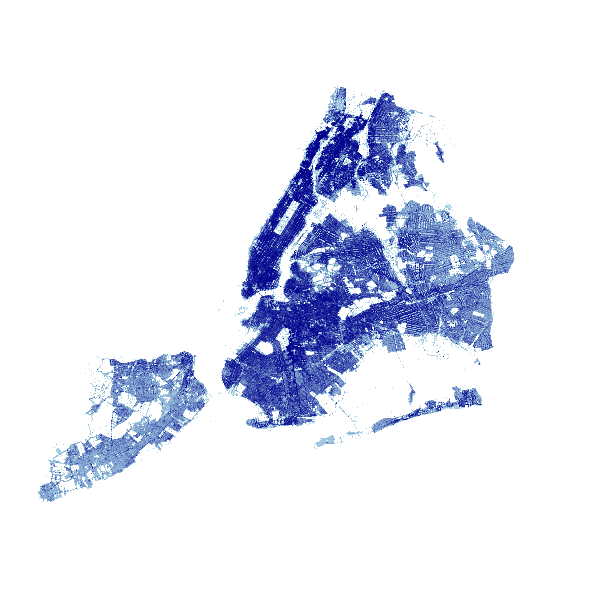

In [8]:
# Visualización del Colormapping

image

### 5. Embedding

Este método en particular toma dos objetos de entrada
(una X y una Y) y devuelve la X y la Y transformadas como dos objetos separados.
Puede aceptar objetos Dask Series sin tener que recogerlos y materializarlos primero en
en una serie Pandas, por lo que simplemente tenemos que pasar la columna Longitud de nuestro
DataFrame original para el valor X, y la columna Latitud de nuestro DataFrame original para el valor
valor Y.


In [10]:
with ProgressBar():
    web_mercator_x, web_mercator_y = lnglat_to_meters(nyc311_geo_data['Longitude'], nyc311_geo_data['Latitude'])
    projected_coordinates = dd.concat([web_mercator_x, web_mercator_y],axis=1).dropna()
    transformed = projected_coordinates.rename(columns={'Longitude':'x','Latitude': 'y'})
    dd.to_parquet(path='nyc311_webmercator_coords', df=transformed,compression="SNAPPY")

[########################################] | 100% Completed | 34.6s


Se utiliza Holoviews, Geoviews y Bokeh con Datashader para producir una visualizacion interactivas mediante una grilla que contiene un mapa.
Esta grillas de mapas se superponen a una cuadrícula utilizando el api de stamen. Si los datos tienen coordenadas de latitud/longitud, primero deben 
transformarse en coordenadas Web Mercator.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
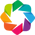

:DynamicMap   []
   :Overlay
      .WMTS.I :WMTS   [Longitude,Latitude]
      .RGB.I  :RGB   [x,y]   (R,G,B,A)

In [11]:
nyc311_geo_data = dd.read_parquet('nyc311_webmercator_coords')

holoviews.extension('bokeh')

stamen_api_url = 'http://tile.stamen.com/terrain/{Z}/{X}/{Y}.jpg'

plot_options = dict(width=900, height=700, show_grid=False)

tile_provider = geoviews.WMTS(stamen_api_url).opts(style=dict(alpha=0.8), plot=plot_options)

points = holoviews.Points(nyc311_geo_data, ['x', 'y'])

service_calls = datashade(points, x_sampling=1, y_sampling=1, width=900, height=700)

tile_provider * service_calls

### Nota:

La siguiente imagen se agrega como referencia pues no es posible visualizar el mapa interactivo mediante el nbviewer

![311](./img/311.PNG)